In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.rcParams["font.family"] = 'NanumBarunGothic'
plt.rcParams["font.size"] = 20

In [3]:
seoul = pd.read_excel('서울시 연도별 정리_r4.xlsx', sheet_name='재정리')

In [4]:
seoul.head()

,연도,지역,살인,강도,강간·추행,절도,폭력,합계,취약계층 가구수,전체 가구수,주거환경,경제환경,사회환경,교육환경
0,2011,강남,0,1,0,87,86,174,506,231983,7.10,5.86,5.62,5.75
1,2011,강동,0,8,14,255,193,470,1073,190392,6.49,5.81,5.89,5.63
2,2011,강북,0,15,16,256,236,523,2326,142527,6.08,4.45,5.39,4.52
3,2011,강서,0,27,17,309,312,665,2706,223490,5.95,4.59,5.09,4.80
4,2011,관악,0,9,12,200,273,494,1620,246979,6.00,5.20,5.81,5.60


In [5]:
pivot = pd.pivot_table(data=seoul, index=['연도', '지역'], aggfunc=np.sum)

In [6]:
pivot = pivot.reindex(columns=['강도', '살인', '강간·추행', '절도', '폭력', '합계', '취약계층 가구수', '전체 가구수', '주거환경', '경제환경', '사회환경', '교육환경'])

In [7]:
pivot.head()

강도  살인  강간·추행   절도   폭력   합계  취약계층 가구수  전체 가구수  주거환경  경제환경  사회환경  \
연도   지역                                                                     
2011 강남   1   0      0   87   86  174       506  231983  7.10  5.86  5.62   
     강동   8   0     14  255  193  470      1073  190392  6.49  5.81  5.89   
     강북  15   0     16  256  236  523      2326  142527  6.08  4.45  5.39   
     강서  27   0     17  309  312  665      2706  223490  5.95  4.59  5.09   
     관악   9   0     12  200  273  494      1620  246979  6.00  5.20  5.81   

         교육환경  
연도   지역        
2011 강남  5.75  
     강동  5.63  
     강북  4.52  
     강서  4.80  
     관악  5.60

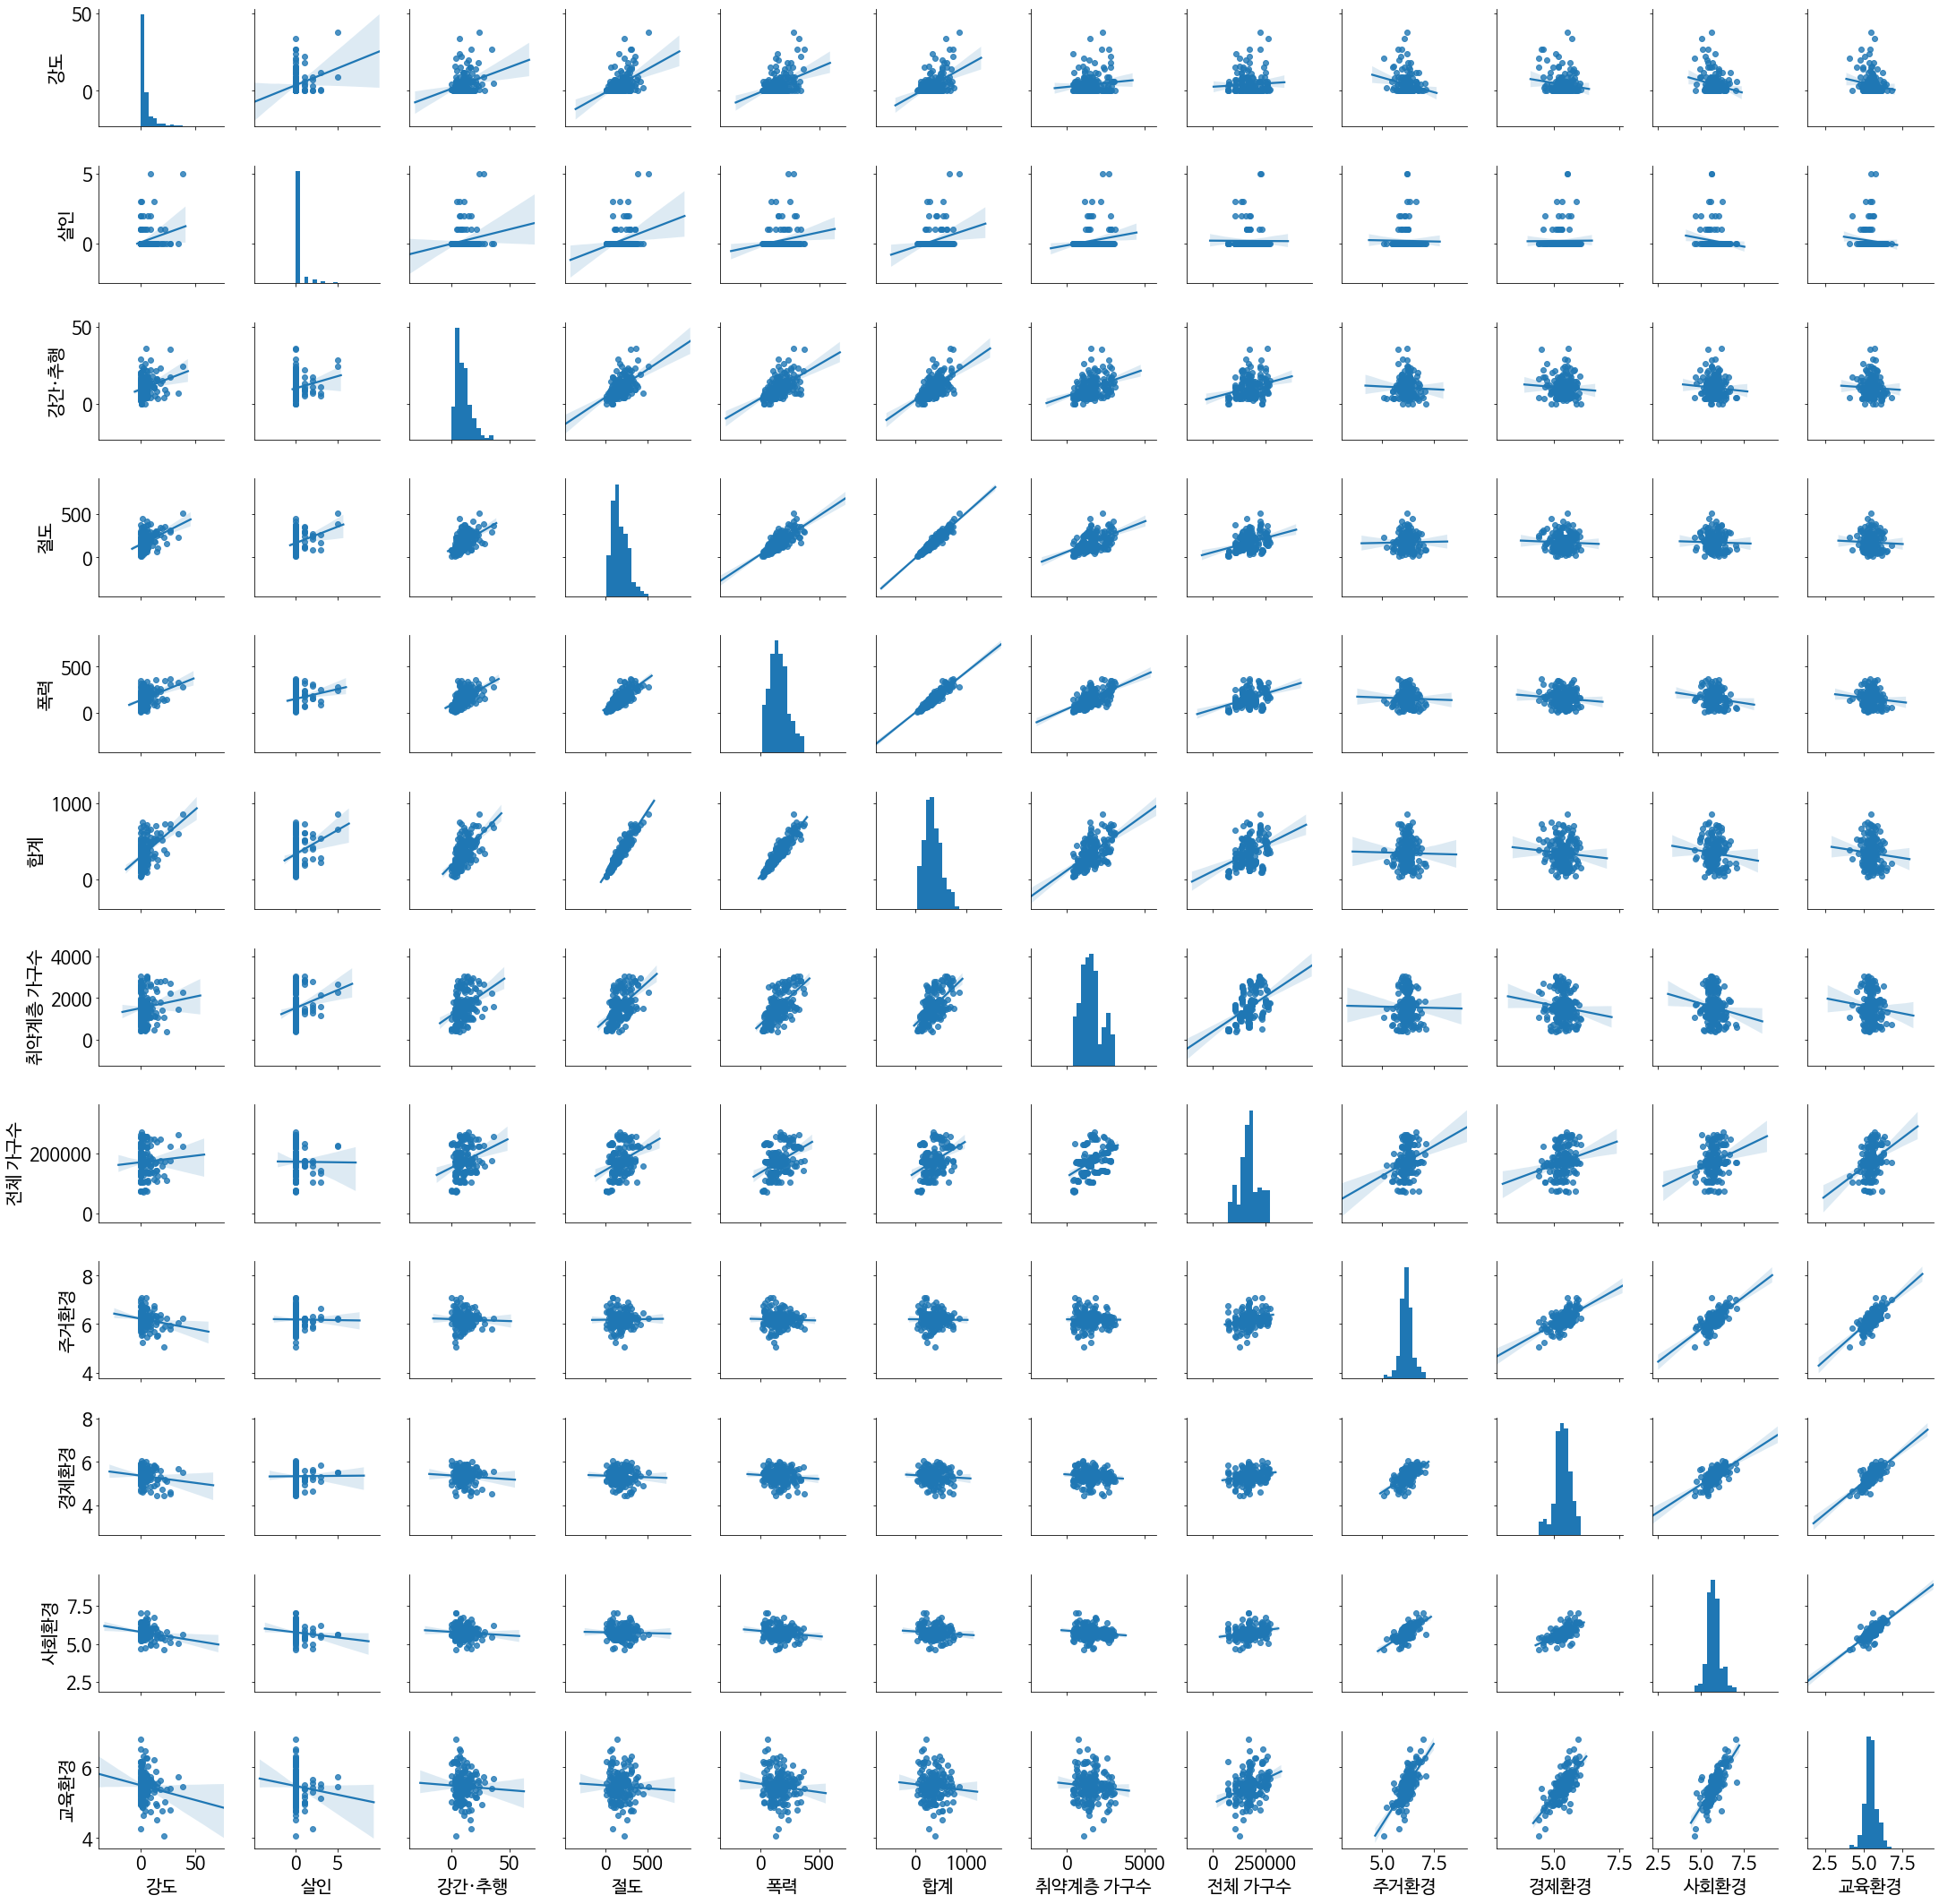

In [8]:
sns.pairplot(pivot, kind='reg')
plt.show()

In [9]:
pivot.corr()

,강도,살인,강간·추행,절도,폭력,합계,취약계층 가구수,전체 가구수,주거환경,경제환경,사회환경,교육환경
강도,1.000000,0.249225,0.278612,0.443587,0.394988,0.478873,0.106966,0.061659,-0.181553,-0.139144,-0.191692,-0.137977
살인,0.249225,1.000000,0.180516,0.297602,0.194062,0.275192,0.187499,-0.005951,-0.012876,0.007899,-0.125066,-0.091535
강간·추행,0.278612,0.180516,1.000000,0.536447,0.551688,0.603056,0.367188,0.269530,-0.034531,-0.072756,-0.075311,-0.043149
절도,0.443587,0.297602,0.536447,1.000000,0.768984,0.948840,0.511470,0.331353,0.016444,-0.043500,-0.026767,-0.039652
폭력,0.394988,0.194062,0.551688,0.768984,1.000000,0.929224,0.624302,0.401093,-0.031384,-0.093135,-0.141376,-0.096545
합계,0.478873,0.275192,0.603056,0.948840,0.929224,1.000000,0.593163,0.383048,-0.014030,-0.075714,-0.091927,-0.074479
취약계층 가구수,0.106966,0.187499,0.367188,0.511470,0.624302,0.593163,1.000000,0.467834,-0.011119,-0.117337,-0.140361,-0.085372
전체 가구수,0.061659,-0.005951,0.269530,0.331353,0.401093,0.383048,0.467834,1.000000,0.263264,0.218704,0.233803,0.330205
주거환경,-0.181553,-0.012876,-0.034531,0.016444,-0.031384,-0.014030,-0.011119,0.263264,1.000000,0.616277,0.685417,0.716397
경제환경,-0.139144,0.007899,-0.072756,-0.043500,-0.093135,-0.075714,-0.117337,0.218704,0.616277,1.000000,0.646601,0.736392


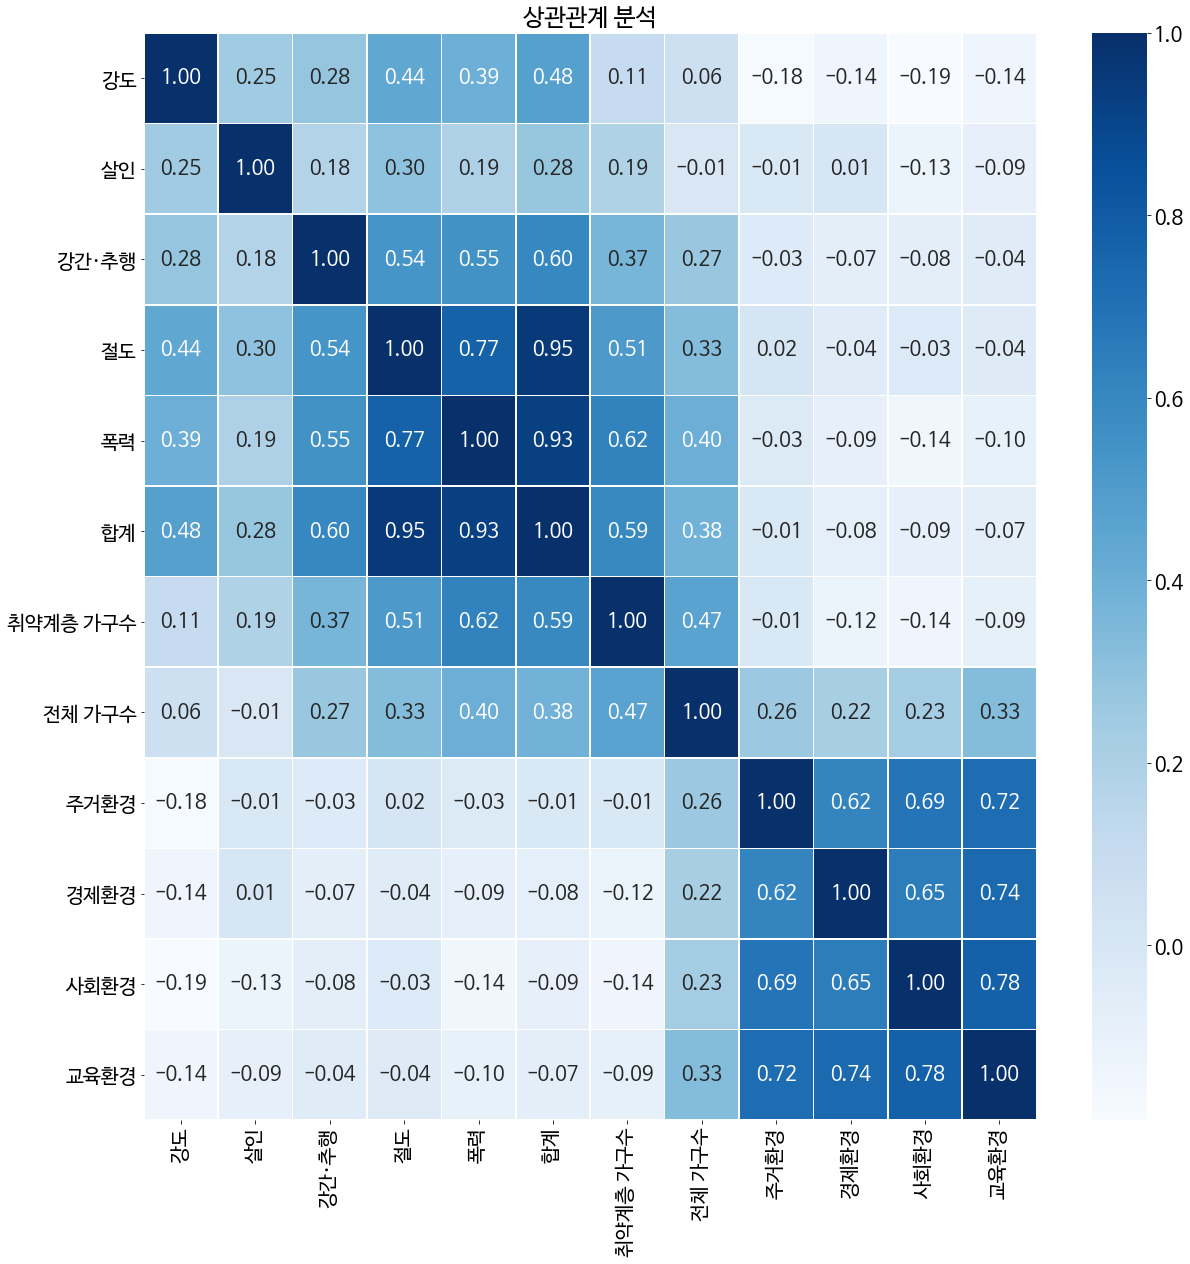

In [12]:
plt.figure(figsize=(20,20))
plt.title('상관관계 분석')
sns.heatmap(data=pivot.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')